In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mydata= pd.read_excel('/content/sample_data/students.xlsx')
mydata.head(10)

,num-read,math-score,cgpa,gender,result
0,not,29,3.10,m,no
1,read,32,2.90,f,no
2,read,40,2.90,NaN,no
3,read,35,3.20,NaN,no
4,not,35,2.75,f,no
5,not,29,3.70,m,no
6,not,30,3.20,m,no
7,not,30,3.50,NaN,no
8,not,32,2.90,f,no
9,not,29,3.20,NaN,no


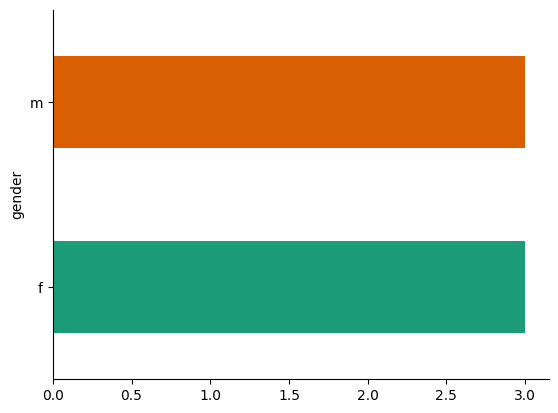

In [3]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

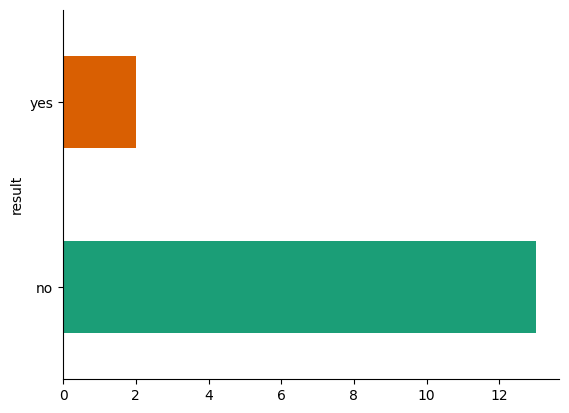

In [4]:
# @title result

from matplotlib import pyplot as plt
import seaborn as sns
mydata.groupby('result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
#data exploratory
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   num-read    15 non-null     object 
 1   math-score  15 non-null     int64  
 2   cgpa        15 non-null     float64
 3   gender      6 non-null      object 
 4   result      15 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 728.0+ bytes


In [6]:
mydata.shape

(15, 5)

In [7]:
mydata.isnull().sum()

num-read      0
math-score    0
cgpa          0
gender        9
result        0
dtype: int64

<Axes: >

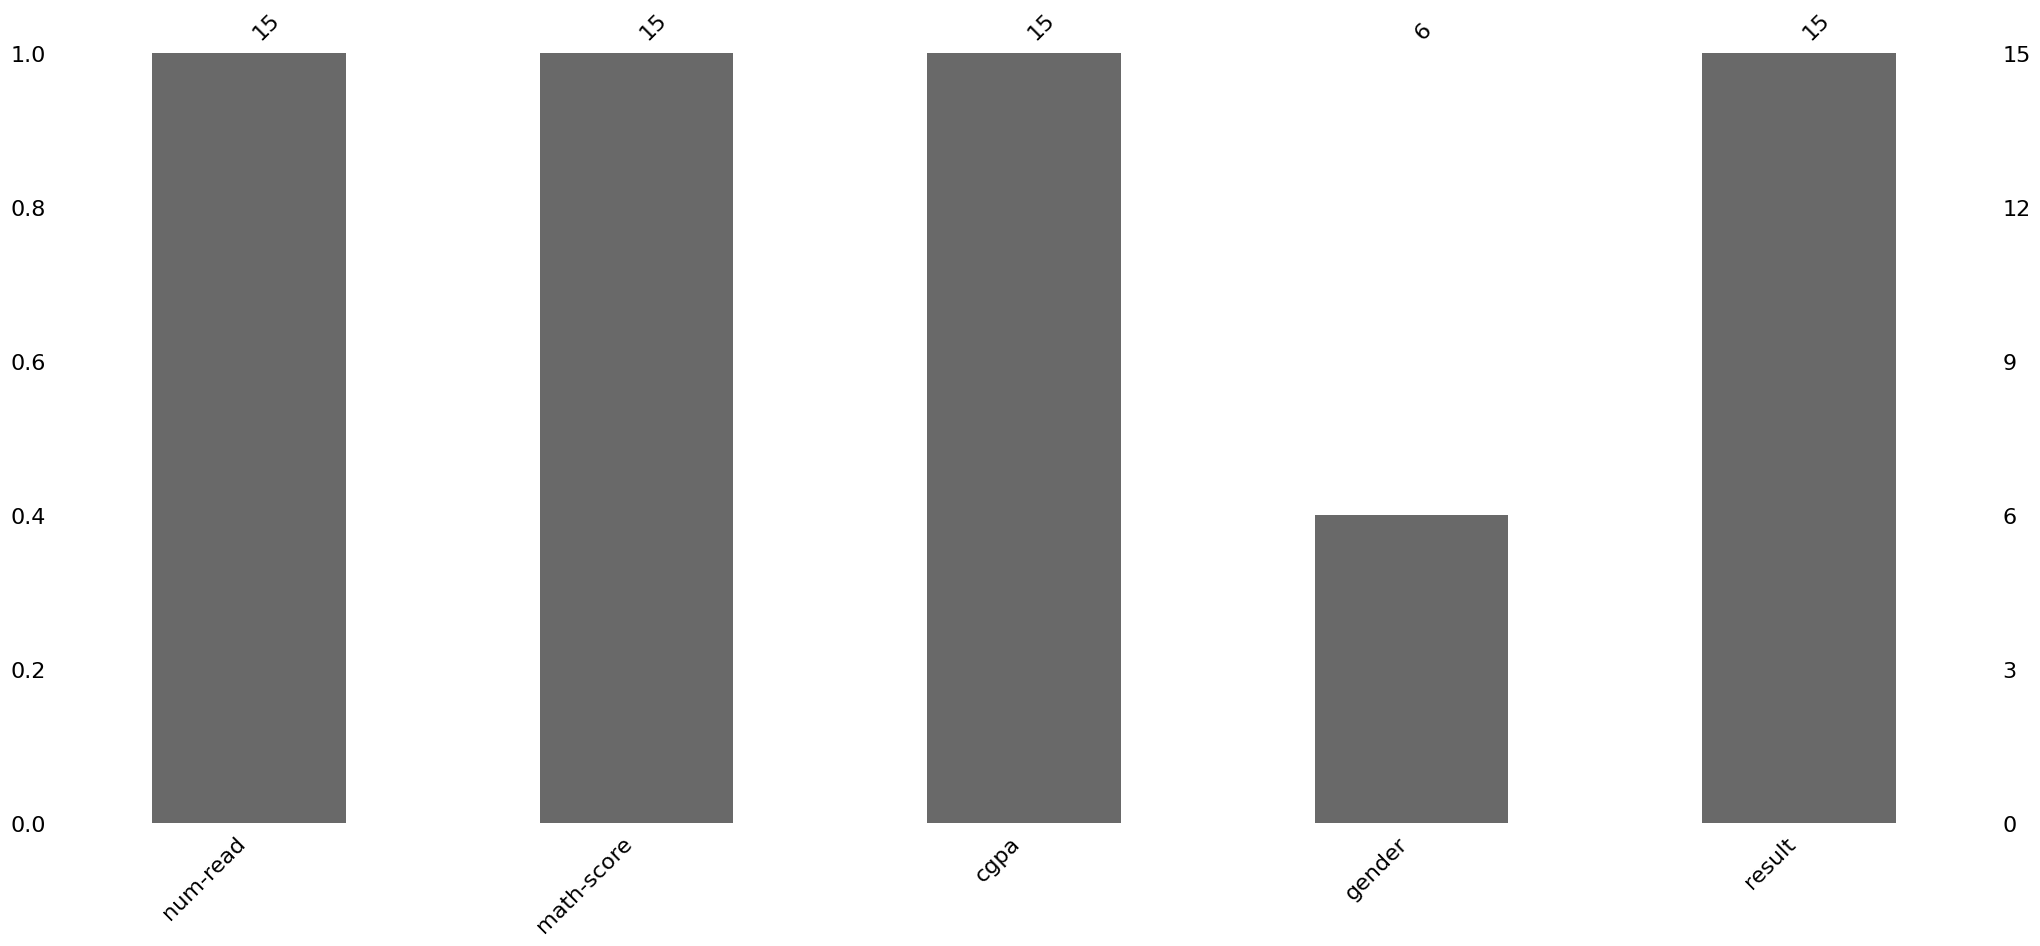

In [8]:
import missingno as msno
msno.bar(mydata)


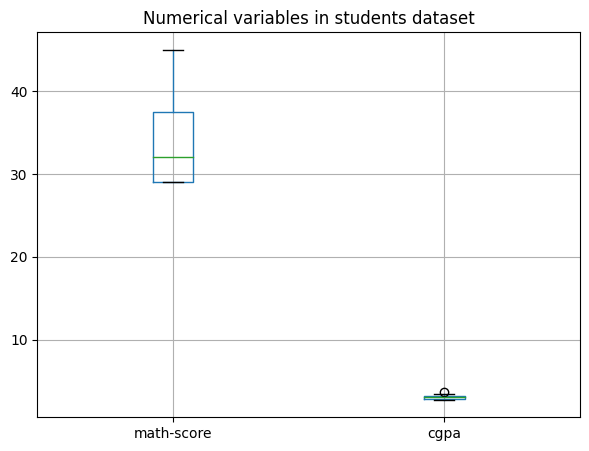

In [9]:
num_cols = ['math-score','cgpa']
plt.figure(figsize=(7,5))
mydata[num_cols].boxplot()
plt.title("Numerical variables in students dataset", fontsize=12)
plt.show()

In [10]:
mydata['gender'] = mydata["gender"].fillna(mydata['gender'].mode()[0])
mydata.head(10)

,num-read,math-score,cgpa,gender,result
0,not,29,3.10,m,no
1,read,32,2.90,f,no
2,read,40,2.90,f,no
3,read,35,3.20,f,no
4,not,35,2.75,f,no
5,not,29,3.70,m,no
6,not,30,3.20,m,no
7,not,30,3.50,f,no
8,not,32,2.90,f,no
9,not,29,3.20,f,no


In [11]:
all_features = [name for name in mydata.columns if mydata[name].dtype == 'object']
all_features

['num-read', 'gender', 'result']

In [12]:
all_features=[name for name in mydata.columns if mydata[name].dtype =='object']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(all_features):
  mydata[i]=le.fit_transform(mydata[i])
for x in all_features:
  print(x," = ",mydata[x].unique())


num-read  =  [0 1]
gender  =  [1 0]
result  =  [0 1]


In [13]:
mydata.head(10)

,num-read,math-score,cgpa,gender,result
0,0,29,3.10,1,0
1,1,32,2.90,0,0
2,1,40,2.90,0,0
3,1,35,3.20,0,0
4,0,35,2.75,0,0
5,0,29,3.70,1,0
6,0,30,3.20,1,0
7,0,30,3.50,0,0
8,0,32,2.90,0,0
9,0,29,3.20,0,0


In [14]:
from sklearn.feature_selection import chi2
X = mydata.drop('result',axis=1)
y = mydata['result']
chi_scores = chi2(X,y)
chi_scores


(array([0.61538462, 2.81318681, 0.02696042, 0.46153846]),
 array([0.43276758, 0.09349248, 0.86957663, 0.49690585]))

In [15]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values


math-score    0.093492
num-read      0.432768
gender        0.496906
cgpa          0.869577
dtype: float64

Text(0.5, 1.0, 'Chi2 test for feature selection')

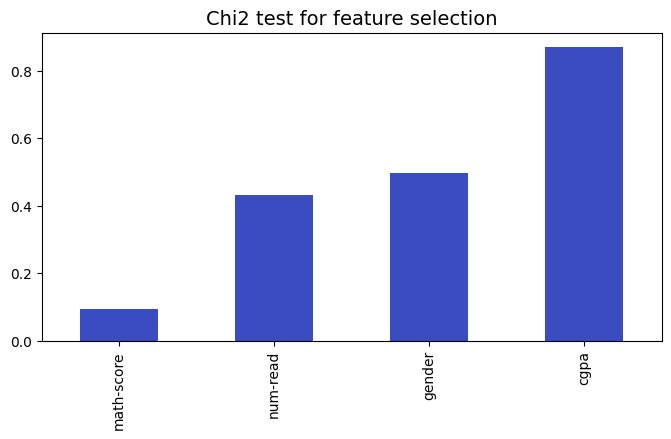

In [16]:
p_values.plot.bar(figsize = (8,4), cmap="coolwarm")
plt.title('Chi2 test for feature selection', size=14)


In [17]:
from sklearn.model_selection import train_test_split
X_new = mydata[['num-read','gender','cgpa']]
y_new = mydata['result']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=200)


In [18]:
from sklearn.tree import DecisionTreeClassifier
modelDTree = DecisionTreeClassifier()

#การฝึกสอนข้อมูล
modelDTree.fit(X_new,y_new)

#การทำนายข้อมูล
predictions = modelDTree.predict(X_test)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[4 0]
 [1 0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

0.8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
